In [12]:
import pandas as pd

In [13]:
article = pd.read_csv('article.csv', index_col = 'Date')
article

,Unnamed: 0,articles
Date,,
Mon Jan 1 09:23:39 2018,0,[新聞] 陸徵環保稅 台商負擔變重
Mon Jan 1 12:13:32 2018,1,[標的] 3450 聯鈞 多
Mon Jan 1 13:04:00 2018,2,[標的] 8039台虹多
Mon Jan 1 16:38:40 2018,3,[標的] 4401 東隆興 多
Mon Jan 1 16:53:39 2018,4,[標的] 6223 旺矽 多
...,...,...
Thu Dec 31 21:14:58 2020,26597,[標的] 6547 高端疫苗 長線多
Thu Dec 31 21:17:47 2020,26598,[新聞] 中華電賣華航持股 處分利益1668萬元
Thu Dec 31 21:17:47 2020,26599,[新聞] 中華電賣華航持股 處分利益1668萬元


In [14]:
article = article[1:]

In [15]:
from  datetime import datetime

date_lt = []
for i in range(len(article)):
    dateString = article.index[i]
    dateFormatter = "%a %b %d %H:%M:%S %Y"
    try:
        date = datetime.strptime(dateString, dateFormatter).strftime('%Y-%m-%d')
    except:
        date = date_lt[i-1]
    
    date_lt.append(date)

In [22]:
article.index = date_lt
article.index = pd.to_datetime(date_lt,utc = True)
article

,Unnamed: 0,articles
2018-01-01 00:00:00+00:00,1,[標的] 3450 聯鈞 多
2018-01-01 00:00:00+00:00,2,[標的] 8039台虹多
2018-01-01 00:00:00+00:00,3,[標的] 4401 東隆興 多
2018-01-01 00:00:00+00:00,4,[標的] 6223 旺矽 多
2018-01-01 00:00:00+00:00,5,[標的] 4535 至興
...,...,...
2020-12-31 00:00:00+00:00,26597,[標的] 6547 高端疫苗 長線多
2020-12-31 00:00:00+00:00,26598,[新聞] 中華電賣華航持股 處分利益1668萬元
2020-12-31 00:00:00+00:00,26599,[新聞] 中華電賣華航持股 處分利益1668萬元
2020-12-31 00:00:00+00:00,26600,[新聞] 中信金、兆豐、上海3銀行拿到「新財管方


In [23]:
article['year'] = article.index.year
article['month'] = article.index.month
article

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,articles,year,month
2018-01-01 00:00:00+00:00,1,[標的] 3450 聯鈞 多,2018,1
2018-01-01 00:00:00+00:00,2,[標的] 8039台虹多,2018,1
2018-01-01 00:00:00+00:00,3,[標的] 4401 東隆興 多,2018,1
2018-01-01 00:00:00+00:00,4,[標的] 6223 旺矽 多,2018,1
2018-01-01 00:00:00+00:00,5,[標的] 4535 至興,2018,1
...,...,...,...,...
2020-12-31 00:00:00+00:00,26597,[標的] 6547 高端疫苗 長線多,2020,12
2020-12-31 00:00:00+00:00,26598,[新聞] 中華電賣華航持股 處分利益1668萬元,2020,12
2020-12-31 00:00:00+00:00,26599,[新聞] 中華電賣華航持股 處分利益1668萬元,2020,12
2020-12-31 00:00:00+00:00,26600,[新聞] 中信金、兆豐、上海3銀行拿到「新財管方,2020,12


In [24]:
down_lt = ['利空','空','空頭','跌','下跌','調降','下修','不如預期']

In [25]:
with open('Stocks_list.txt', encoding = 'utf-8') as f:
    stock_lt = f.read()

In [26]:
stock_lt = stock_lt.split('\n')

In [27]:
stock_lt = [s for s in stock_lt if s != '']
len(stock_lt)

30959

In [30]:
article_div = article.loc[~article.articles.duplicated()]

In [32]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 11.7 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=9bfe7436db5c6cf218a08f615e218dbe1bfa429331342091af61515ee20443c9
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [33]:
import numpy as np
import pandas as pd
import yfinance as yf

In [34]:
def record_holdings(symbol, shares, holdings):
    
    if symbol in holdings:
        quantity = {'Quantity': shares}
        holdings[symbol].update(quantity)
        
    else:
        quantity = {'Quantity': shares}
        holdings.update({symbol:quantity})
        
        return holdings

In [35]:
import math

In [38]:
article_div

,Unnamed: 0,articles,year,month
2018-01-01 00:00:00+00:00,1,[標的] 3450 聯鈞 多,2018,1
2018-01-01 00:00:00+00:00,2,[標的] 8039台虹多,2018,1
2018-01-01 00:00:00+00:00,3,[標的] 4401 東隆興 多,2018,1
2018-01-01 00:00:00+00:00,4,[標的] 6223 旺矽 多,2018,1
2018-01-01 00:00:00+00:00,5,[標的] 4535 至興,2018,1
...,...,...,...,...
2020-12-31 00:00:00+00:00,26596,[新聞] 資金輪動搶進IC設計股 系微漲停、驅動IC雙雄激昂,2020,12
2020-12-31 00:00:00+00:00,26597,[標的] 6547 高端疫苗 長線多,2020,12
2020-12-31 00:00:00+00:00,26598,[新聞] 中華電賣華航持股 處分利益1668萬元,2020,12
2020-12-31 00:00:00+00:00,26600,[新聞] 中信金、兆豐、上海3銀行拿到「新財管方,2020,12


----------------------------------------------------

In [36]:
import numpy as np
import pandas as pd
import collections
import yfinance as yf

In [ ]:
#pair = pd.read_csv('pair.csv')

init = 1000000
holding_stocks = {}


for i in range(2018,2021):
    for j in range(12):
        print(j)
        article_div = article[(article.year==i) & (article.month == (j+1))]
        title=[]
        for t in article_div['articles'].values:
            for key in down_lt:
                filtered_title = []
                if key not in t:
                    filtered_title1 = t
                    filtered_title.append(filtered_title1)
                else:
                    filtered_title1 = ''
                    filtered_title.append(filtered_title1)
                    filtered_title = filtered_title[-1]
                    break

            if len(filtered_title)> 1:
                filtered_title = filtered_title[0]

            title.extend(filtered_title)

        target=[]
        for t in title:
            for s in stock_lt:
                if s in t:
                    picked_target = s
                    break
                else:
                    continue
            target.append(picked_target)
            
        #import collections
        stock_counts = collections.Counter(target) 
        stock_counts_top10 = stock_counts.most_common(5)
        
        code1_lt = []
        code2_lt = []
        for x in range(len(stock_counts_top10)):
            idx = pair[pair['stock']==stock_counts_top10[x][0]].index.values
            if idx.size >0:
                if idx< 24308:
                    code1 = pair.iloc[idx].code.values
                    code1_lt.append(code1[0])
                else:
                    code2 = pair.iloc[idx].code.values
                    code2_lt.append(code2[0])
        ticker = list(map('{}.TW'.format, code1_lt))
        ticker.extend(list(map('{}.TWO'.format, code2_lt)))
        
        start = article_div.index[0] + pd.DateOffset(months=1)
        end= article_div.index[0]+ pd.DateOffset(months=2)
        
        data = yf.download(ticker, start, end)
        Ps = pd.DataFrame(data['Adj Close'])
        Ps = Ps.dropna()
        

        pos = pd.DataFrame(data = np.zeros((len(Ps), 1)), index = Ps.index[:], columns = ['Values'])
        cash = pd.DataFrame(data = np.zeros((len(Ps), 1)), index = Ps.index[:], columns = ['Values'])
        total = pd.DataFrame(data = np.zeros((len(Ps), 1)), index = Ps.index[:], columns = ['Values'])
        

        for d in range(len(Ps)):
            if d == 0:
                money = init
                
                for s in ticker:
                    price = Ps[s].iloc[d]
                    date = Ps[s].index[d]
                    cap_per_pos = riskparity(Ps)[s]
                    shares = int((money * cap_per_pos)/price)
                    pos.iloc[d,0] += price * shares
                    holding_stocks = record_holdings(s, price, shares, holding_stocks)

                   
            else:
                for s in ticker:
                    price = Ps[s].iloc[d]
                    date = Ps[s].index[d]
                    shares = holding_stocks[s]['Quantity']
                    pos.iloc[d, 0] += shares * price
        
        init = pos.iloc[d, 0]

In [ ]:
pos_values = pd.DataFrame([pos_dict], index = ['Values']).T
pos_values

,Values
2018-02-01,999903.00
2018-02-02,996260.04
2018-02-05,993880.60
2018-02-06,944620.04
2018-02-07,946848.66
...,...
2021-01-25,1375514.59
2021-01-26,1338971.16
2021-01-27,1334852.74
2021-01-28,1295090.22


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

(array([17532., 17652., 17775., 17897., 18017., 18140., 18262., 18383.,
        18506., 18628.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

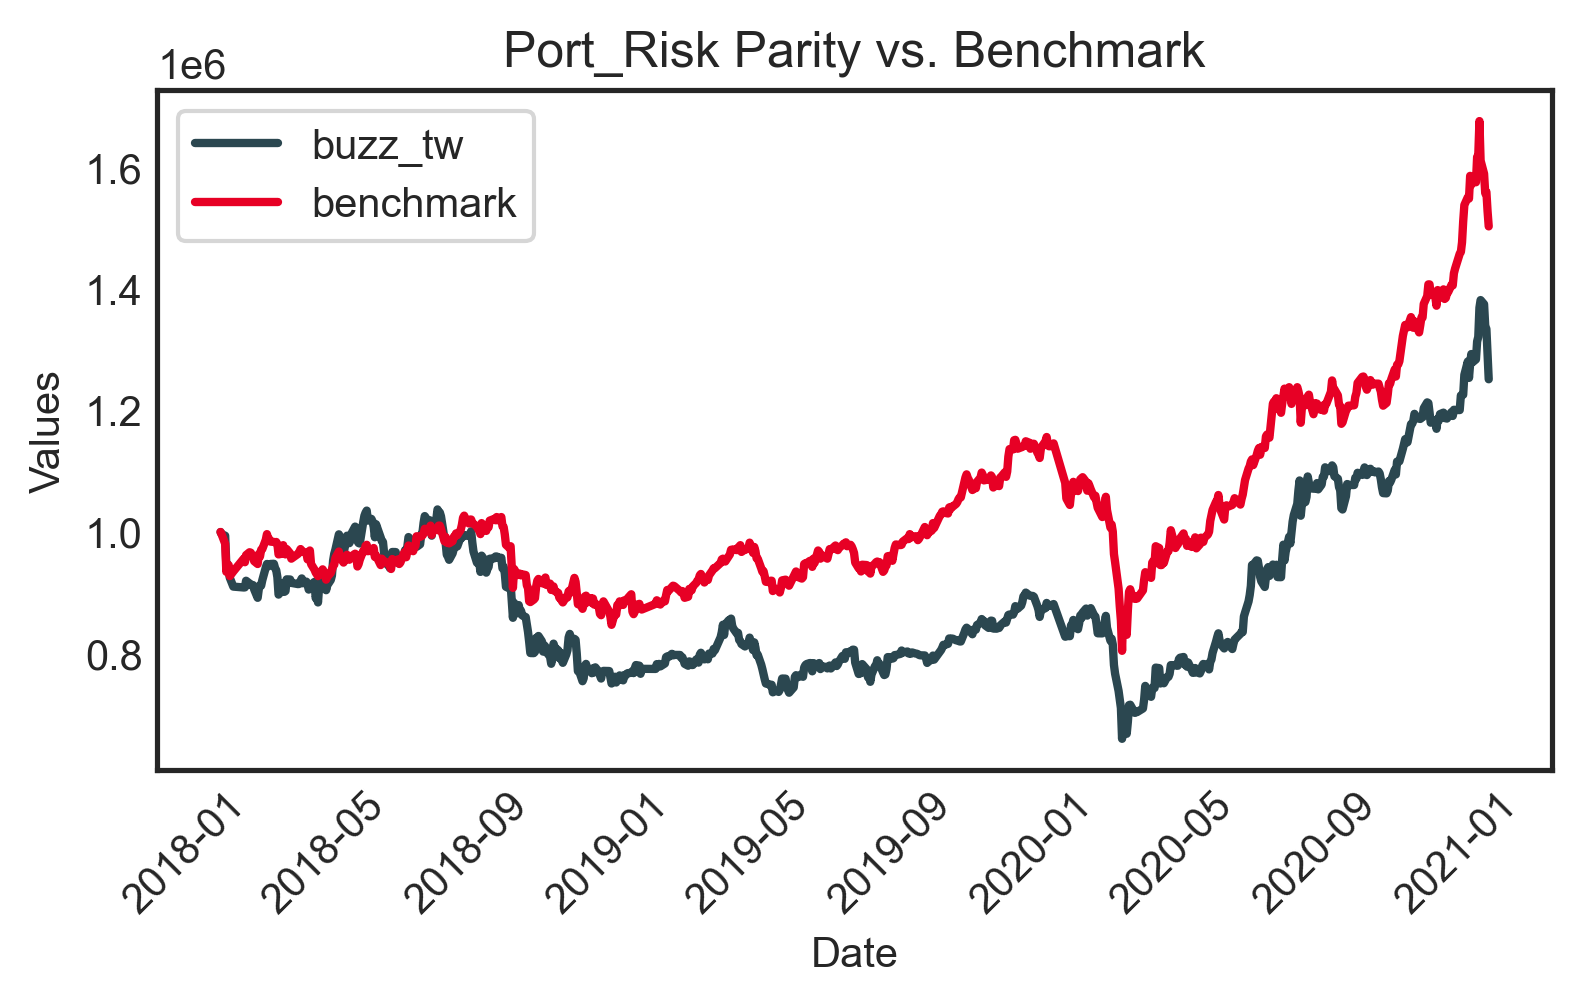

In [ ]:
x = pos_values.index
y1 = pos_values.Values
y2 = bm_value.Values


plt.figure(figsize=(6,3),dpi=300)
plt.plot(x, y1, color='#2b4750', linewidth=2, linestyle='-', label='buzz_tw')
plt.plot(x, y2, color='#E70025', linewidth=2, linestyle='-', label='benchmark')
plt.title('Port_Risk Parity vs. Benchmark')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(loc='upper left', frameon=True)

In [ ]:
start = '2018-02-01'
end = '2021-01-31'
Benchmark = yf.download('0050.TW', start, end)
Benchmark = pd.DataFrame(Benchmark['Adj Close'])
Benchmark = Benchmark.dropna()
Benchmark

[*********************100%***********************]  1 of 1 downloaded


,Adj Close
Date,
2018-02-01,85.25
2018-02-02,84.90
2018-02-05,83.60
2018-02-06,79.65
2018-02-07,80.65
...,...
2021-01-25,135.60
2021-01-26,132.85
2021-01-27,133.05


In [ ]:
init = 1000000
bm_value = pd.DataFrame(data = np.zeros((len(Benchmark), 1)), index = Benchmark.index[:], columns = ['Values'])

for i in range(0, len(bm_value)):
    if i == 0:
        bm_value.iloc[i, 0] = init
        benchshare = init / Benchmark.iloc[i, 0]
    else:
        bm_value.iloc[i, 0] = benchshare * Benchmark.iloc[i, 0]

In [ ]:
import pandas as pd
#import pandas_datareader.data as web
import numpy as np
import datetime
from scipy.optimize import minimize

In [ ]:
def riskparity(dataset):
 
    TOLERANCE = 1e-10

    def _allocation_risk(weights, covariances):

        # We calculate the risk of the weights distribution
        portfolio_risk = np.sqrt((weights * covariances * weights.T))[0, 0]

        # It returns the risk of the weights distribution
        return portfolio_risk


    def _assets_risk_contribution_to_allocation_risk(weights, covariances):

        # We calculate the risk of the weights distribution
        portfolio_risk = _allocation_risk(weights, covariances)

        # We calculate the contribution of each asset to the risk of the weights distribution
        assets_risk_contribution = np.multiply(weights.T, covariances * weights.T)/ portfolio_risk

        # It returns the contribution of each asset to the risk of the weights distribution
        return assets_risk_contribution


    def _risk_budget_objective_error(weights, args):

        # The covariance matrix occupies the first position in the variable
        covariances = args[0]

        # The desired contribution of each asset to the portfolio risk occupies the second position
        assets_risk_budget = args[1]

        # We convert the weights to a matrix
        weights = np.matrix(weights)

        # We calculate the risk of the weights distribution
        portfolio_risk = _allocation_risk(weights, covariances)

        # We calculate the contribution of each asset to the risk of the weights distribution
        assets_risk_contribution = _assets_risk_contribution_to_allocation_risk(weights, covariances)

        # We calculate the desired contribution of each asset to the risk of the weights distribution
        assets_risk_target = np.asmatrix(np.multiply(portfolio_risk, assets_risk_budget))

        #Error between the desired contribution and the calculated contribution of
        # each asset
        error = sum(np.square(assets_risk_contribution - assets_risk_target.T))[0, 0]

        # It returns the calculated error
        return error


    def _get_risk_parity_weights(covariances, assets_risk_budget, initial_weights):

        # Restrictions to consider in the optimisation: only long positions whose
        # sum equals 100%
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1.0},
                        {'type': 'ineq', 'fun': lambda x: x})

        # Optimisation process in scipy
        optimize_result = minimize(fun=_risk_budget_objective_error,
                                    x0=initial_weights,
                                    args=[covariances, assets_risk_budget],
                                    method='SLSQP',
                                    constraints=constraints,
                                    tol=TOLERANCE,
                                    options={'disp': False})

        # Recover the weights from the optimised object
        weights = optimize_result.x

        # It returns the optimised weights
        return weights


    pd.to_datetime(dataset.index, format="%Y/%m/%d")
    covariances = 252.0 * dataset.pct_change().iloc[1:, :].cov().values

    assets_risk_budget = [1 / dataset.shape[1]] * dataset.shape[1]
    init_weights = [1 / dataset.shape[1]] * dataset.shape[1]
    weights = _get_risk_parity_weights(covariances, assets_risk_budget, init_weights)

    weights = pd.Series(weights, index=dataset.columns, name='weight')
    return weights

In [ ]:
riskparity(Ps)

2303.TW    0.173590
2317.TW    0.234160
2330.TW    0.437785
2603.TW    0.154465
Name: weight, dtype: float64

In [ ]:
def performance(port_value):

    #annual vol.
    ann_vol = (port_value.pct_change().std()) * np.sqrt(252)
    port_ret = pd.DataFrame(index = port_value.index, columns=['Values'])
    port_ret['Values'] = port_value.pct_change()

    #cum return & MDD
    port_cum = pd.DataFrame(index = port_ret.index, columns=['Cum_Ret','temp','DD','DD_Duration'])

    for i in range(len(port_ret)):
        if i == 0:
            port_cum['Cum_Ret'].iloc[i] = 0
            port_cum['temp'].iloc[i] = port_cum['Cum_Ret'].iloc[i]
        else:
            port_cum['Cum_Ret'].iloc[i] = (1 + port_ret['Values'].iloc[i]) * (1 + port_cum['Cum_Ret'].iloc[i-1]) - 1
            if port_cum['Cum_Ret'].iloc[i] > port_cum['temp'].iloc[i-1]:
                port_cum['temp'].iloc[i] = port_cum['Cum_Ret'].iloc[i]
            else:
                port_cum['temp'].iloc[i] = port_cum['temp'].iloc[i-1]  

        port_cum['DD'].iloc[i] = ((1 + port_cum['temp'].iloc[i]) - (1 + port_cum['Cum_Ret'].iloc[i])) / (1 + port_cum['temp'].iloc[i])
        if i == 0:
            port_cum['DD'].iloc[i] = 0
        else:
            if port_cum['DD'].iloc[i] != 0:
                port_cum['DD_Duration'].iloc[i] = port_cum['DD_Duration'].iloc[i-1] + 1
            else:
                port_cum['DD_Duration'].iloc[i] = 0 


    MDD = port_cum['DD'].max()
    MDD_duration = port_cum['DD_Duration'].max()
    total_ret = port_value.iloc[-1]/port_value.iloc[0] - 1 
    
    #annual ret.
    ann_ret = (1 + total_ret) ** (1 / float((len(port_value)) / 252.0)) - 1 

    #sharpe ratio
    sharpe_ratio = ann_ret / ann_vol

    print('annual volatility:{}'.format(ann_vol.iloc[0]))
    print('annual ret.:{}'.format(ann_ret.iloc[0]))
    print('sharpe ratio:{}'.format(sharpe_ratio.iloc[0]))
    print('MDD:{}'.format(MDD))
    print('MDD_duration:{} days'.format(MDD_duration))

In [ ]:
performance(pos_values)

annual volatility:0.19439104787403524
annual ret.:0.009022335207857113
sharpe ratio:0.04641332667594629
MDD:0.4159250845201996
MDD_duration:19 days


In [ ]:
performance(bm_value)

annual volatility:0.1874382772012089
annual ret.:0.1514686587356957
sharpe ratio:0.8080988632492553
MDD:0.3047667342799185
MDD_duration:268 days
